In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r'C:/Users/USER/Desktop/ml resoources/cats_and_dogs_small/train'
validation_dir = r'C:/Users/USER/Desktop/ml resoources/cats_and_dogs_small/validation'
test_dir = r'C:/Users/USER/Desktop/ml resoources/cats_and_dogs_small/test'

#  Data Preprocessing

 - Read the picture files
 - Decode the JPEG models to RGB grids of pixels
 - Convert these into floating point tensors
 - Rescale the pixel values (between 0 to 255) to the [0,1] interval

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link: https://keras.io/api/preprocessing/image/

In [5]:
#Generating batches of tensor image data

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20, 
    class_mode = "binary")

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20, 
    class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu",
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation = "relu"))

model.add(layers.Dense(1, activation = "sigmoid"))

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

In [14]:
from tensorflow.keras import optimizers
model.compile(loss = "binary_crossentropy",
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ["acc"])

In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 183s 2s/step - loss: 0.6874 - acc: 0.5325 - val_loss: 0.6641 - val_acc: 0.6140
Epoch 2/20
100/100 [==============================] - 149s 1s/step - loss: 0.6446 - acc: 0.6290 - val_loss: 0.6363 - val_acc: 0.6140
Epoch 3/20
100/100 [==============================] - 149s 1s/step - loss: 0.5945 - acc: 0.6825 - val_loss: 0.6309 - val_acc: 0.6340
Epoch 4/20
100/100 [==============================] - 164s 2s/step - loss: 0.5624 - acc: 0.7105 - val_loss: 0.6024 - val_acc: 0.6750
Epoch 5/20
100/100 [==============================] - 152s 2s/step - loss: 0.5365 - acc: 0.7300 - val_loss: 0.5794 - val_acc: 0.6870
Epoch 6/20
100/100 [==============================] - 152s 2s/step - loss: 0.5011 - acc: 0.7560 - val_loss: 0.5945 - val_acc: 0.6840
Epoch 7/20
100/100 [==============================] - 147s 1s/step - loss: 0.4837 - acc: 0.7670 - val_loss: 0.5733 - val_acc: 

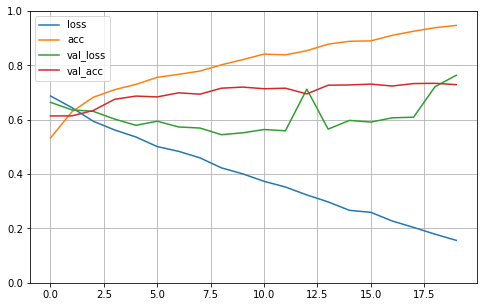

In [16]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
model.save("model.h5")

In [18]:
from tensorflow.keras import backend as k

In [19]:
k.clear_session()
del model

#  Data Augmentation Preprocessing

In [25]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip =True)

In [26]:
test_datagen = ImageDataGenerator(1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32, 
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [28]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32, 
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


#  Data Augmentation Training and Results

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation = "relu",
                       input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

In [35]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100, 
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50)

Epoch 1/100
 63/100 [=================>............] - 139s 2s/step - loss: 0.6872 - acc: 0.5435 - val_loss: 17.4152 - val_acc: 0.5670


In [ ]:
model.save("project_cnn.h5")

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
k.clear_session()
del model

# VGG16

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [39]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False, 
                  input_shape = (150,150,3))

58892288/58889256 [==============================] - 376s 6us/step


In [40]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [41]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [47]:
#conv_base.trainable = False- reduces the no of training parameters in our model
#and as well improve the execution time. will reduce from 16m to 2.1m

In [48]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=2e-5),
             metrics = ['acc'])

In [49]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5",save_best_only = True)

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs = 30,
                              validation_data = validation_generator,
                              validation_steps = 50,
                              callbacks=[checkpoint_cb])

Epoch 1/30
100/100 [==============================] - 2739s 27s/step - loss: 0.5067 - acc: 0.7515 - val_loss: 2.1529 - val_acc: 0.9220
Epoch 2/30
100/100 [==============================] - 4306s 43s/step - loss: 0.2892 - acc: 0.8760 - val_loss: 2.0598 - val_acc: 0.9450
Epoch 3/30
100/100 [==============================] - 2748s 27s/step - loss: 0.2307 - acc: 0.9070 - val_loss: 33.0791 - val_acc: 0.6920
Epoch 4/30
100/100 [==============================] - 2840s 28s/step - loss: 0.1795 - acc: 0.9230 - val_loss: 14.1206 - val_acc: 0.8440
Epoch 5/30
100/100 [==============================] - 2540s 25s/step - loss: 0.1592 - acc: 0.9300 - val_loss: 2.8010 - val_acc: 0.9600
Epoch 6/30
100/100 [==============================] - 3316s 33s/step - loss: 0.1241 - acc: 0.9530 - val_loss: 5.6469 - val_acc: 0.9410
Epoch 7/30
100/100 [==============================] - 2787s 28s/step - loss: 0.1138 - acc: 0.9525 - val_loss: 4.8415 - val_acc: 0.9620
Epoch 8/30
100/100 [==============================] -

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
hist_df = pd.DataFrame(history.history)

In [ ]:
hist_csv_file = 'history.csv'
with open (hist_csv_file,mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

In [ ]:
model.evaluate_generator(test_generator, steps = 50)